In [1]:
import mediapipe as mp
import cv2 
import time 

In [5]:
import mediapipe as mp
import cv2

class handDetector:
    def __init__(self, mode=False, maxHands=2, detectionCon=0.5, trackCon=0.5):
        self.mode = mode
        self.maxHands = maxHands
        self.detectionCon = detectionCon
        self.trackCon = trackCon

        self.mpHands = mp.solutions.hands
        self.hands = self.mpHands.Hands(
            static_image_mode=self.mode,
            max_num_hands=self.maxHands,
            min_detection_confidence=self.detectionCon,
            min_tracking_confidence=self.trackCon
        )
        self.mpDraw = mp.solutions.drawing_utils

    def findHands(self, img, draw=True):
        imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        self.results = self.hands.process(imgRGB)

        if self.results.multi_hand_landmarks:
            for handLms in self.results.multi_hand_landmarks:
                if draw:
                    self.mpDraw.draw_landmarks(img, handLms, self.mpHands.HAND_CONNECTIONS)
        return img

    def findPosition(self, img, handNo=0, draw=True):
        lmList = []
        if self.results.multi_hand_landmarks:
            myHand = self.results.multi_hand_landmarks[handNo]
            for id, lm in enumerate(myHand.landmark):
                h, w, c = img.shape
                cx, cy = int(lm.x * w), int(lm.y * h)
                lmList.append([id, cx, cy])
                if draw:
                    cv2.circle(img, (cx, cy), 7, (255, 0, 255), cv2.FILLED)
        return lmList


In [3]:
def main():

    pTime = 0
    cTime = 0 
    cap = cv2.VideoCapture(0)
    detector = handDetector()
    while True:
        success , img = cap.read()
        img = detector.findHands(img)
        lmList = detector.findPosition(img)
        if len(lmList) != 0:
            print(lmList[4])
        cTime = time.time()
        fps = 1 / (cTime - pTime)
        pTime = cTime 
        cv2.putText(img, str(int(fps)), (10,70), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,0,255), 3)
        cv2.imshow('Image',img)
        cv2.waitKey(1)


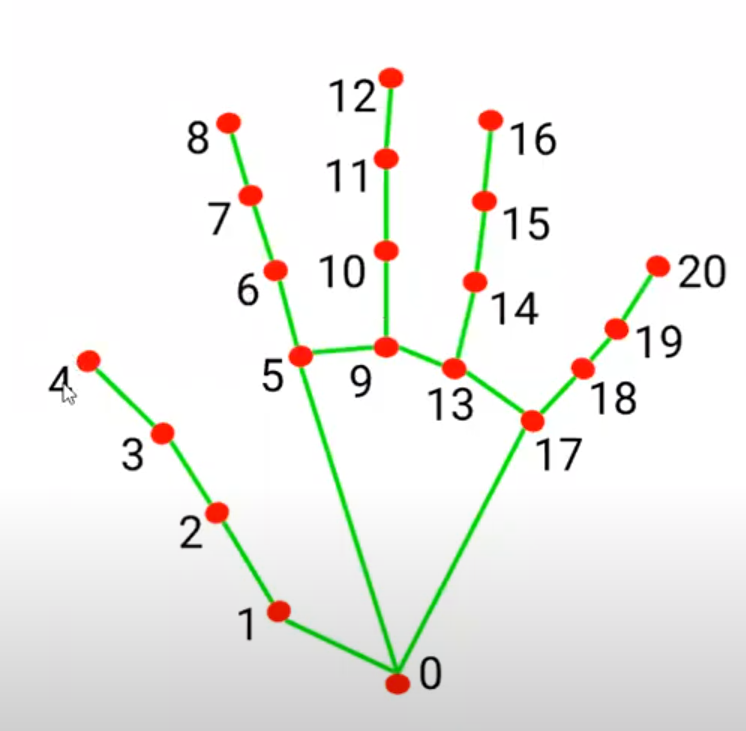

In [6]:
if __name__ == '__main__':
    main()

c:\python\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


[4, 312, 452]
[4, 275, 453]
[4, 321, 442]
[4, 319, 444]
[4, 311, 439]
[4, 313, 438]
[4, 295, 419]
[4, 295, 401]
[4, 295, 401]
[4, 297, 397]
[4, 297, 398]
[4, 284, 388]
[4, 281, 386]
[4, 293, 372]
[4, 253, 327]
[4, 231, 258]
[4, 238, 258]
[4, 237, 259]
[4, 214, 242]
[4, 218, 245]
[4, 218, 248]
[4, 222, 246]
[4, 223, 246]
[4, 223, 246]
[4, 244, 317]
[4, 292, 315]
[4, 287, 318]
[4, 287, 303]
[4, 290, 305]
[4, 298, 302]
[4, 294, 296]
[4, 295, 297]
[4, 296, 297]
[4, 297, 297]
[4, 300, 298]
[4, 301, 299]
[4, 301, 300]
[4, 303, 302]
[4, 304, 304]
[4, 301, 308]
[4, 300, 311]
[4, 281, 315]
[4, 278, 317]
[4, 239, 330]
[4, 381, 319]
[4, 378, 321]
[4, 359, 307]
[4, 360, 305]
[4, 352, 300]
[4, 352, 300]
[4, 356, 299]
[4, 368, 293]
[4, 370, 293]
[4, 387, 282]
[4, 390, 282]
[4, 417, 267]
[4, 420, 265]
[4, 404, 270]
[4, 369, 285]
[4, 366, 290]
[4, 352, 282]
[4, 352, 281]
[4, 355, 282]
[4, 355, 283]
[4, 359, 286]
[4, 355, 292]
[4, 356, 291]
[4, 354, 297]
[4, 353, 296]
[4, 356, 299]
[4, 355, 299]
[4, 35

KeyboardInterrupt: 

: 